# **Diabetes Prediction: A Classification Problem**

In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

### **Importing the dataset**

In [2]:
df=pd.read_csv("diabetes_dataset.csv")
df.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
2,183,64,0,0,23.3,0.672,32,1
3,89,66,23,94,28.1,0.167,21,0
4,137,40,35,168,43.1,2.288,33,1


### **Exploratory Data Analysis**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Glucose                   768 non-null    int64  
 1   BloodPressure             768 non-null    int64  
 2   SkinThickness             768 non-null    int64  
 3   Insulin                   768 non-null    int64  
 4   BMI                       768 non-null    float64
 5   DiabetesPedigreeFunction  768 non-null    float64
 6   Age                       768 non-null    int64  
 7   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 48.1 KB


In [4]:
df.duplicated().sum()

0

In [5]:
df.isna().sum()

Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
df.describe()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Therefore, the dataset has no duplicates or null values.

**Note that, some features like Glucose, BloodPressure, SkinThickness, Insulin, and BMI have zero values, which is absurd. So, we treat the zeros in these columns as NaN values.**

In [7]:
df_copy = df.copy(deep = True)
df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

print(df_copy.isnull().sum())

Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


Imputing the NaN values by suitable statistical measures

In [8]:
df_copy['Glucose'].fillna(df_copy['Glucose'].mean(), inplace = True)
df_copy['BloodPressure'].fillna(df_copy['BloodPressure'].mean(), inplace = True)
df_copy['SkinThickness'].fillna(df_copy['SkinThickness'].median(), inplace = True)
df_copy['Insulin'].fillna(df_copy['Insulin'].median(), inplace = True)
df_copy['BMI'].fillna(df_copy['BMI'].median(), inplace = True)

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

Checking for Outliers

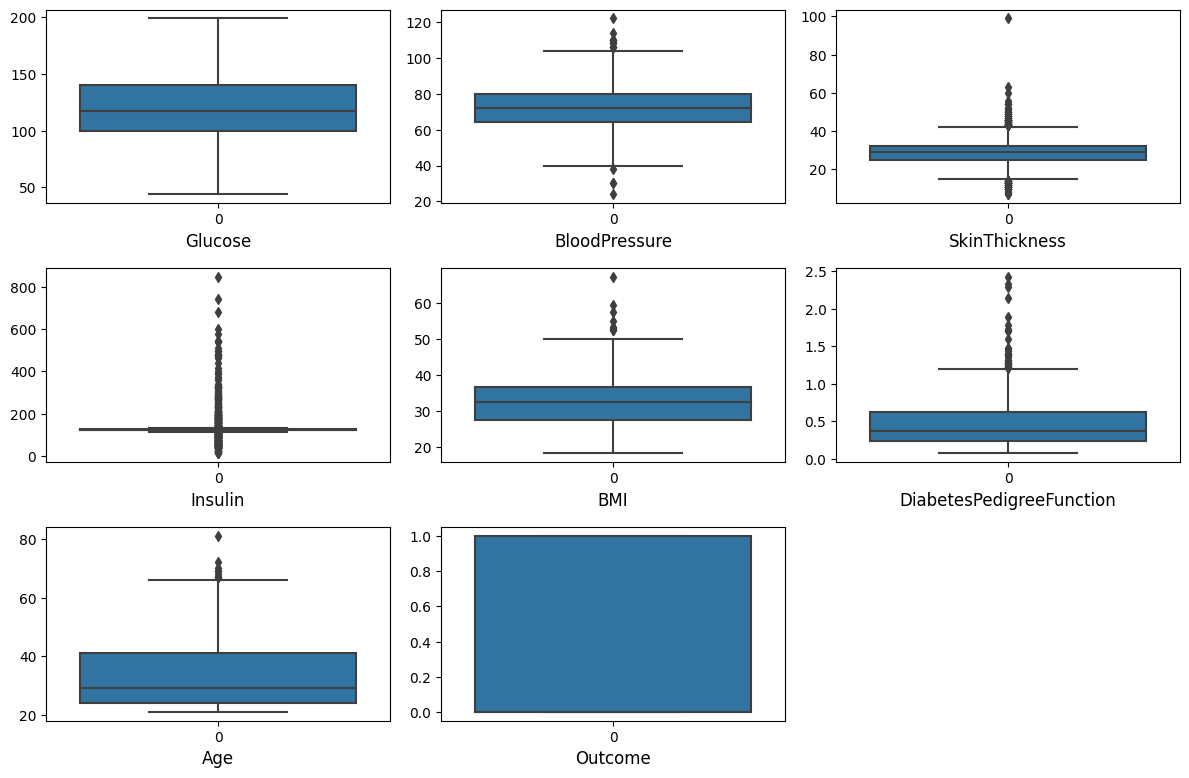

In [10]:
plt.figure(figsize = (12,10))
plot_no = 1
for i in df_copy.columns:
    ax = plt.subplot(4,3, plot_no)
    sns.boxplot(df_copy[i])
    plt.xlabel(i, fontsize=12)
    plot_no +=1
plt.tight_layout()
plt.show()

Capping the outliers

In [11]:
def outlier_capping(dataframe: pd.DataFrame, outliers:list):
    capped_df = dataframe.copy()
    for i in outliers:
        q1 = capped_df[i].quantile(0.25)
        q3 = capped_df[i].quantile(0.75)
        iqr = q3 - q1
        upper_limit = q3 + 1.5 *iqr
        lower_limit = q1 - 1.5 *iqr
        capped_df.loc[capped_df[i] >upper_limit, i] = upper_limit
        capped_df.loc[capped_df[i] <lower_limit, i] = lower_limit
    return capped_df

In [12]:
df_filtered=outlier_capping(df_copy,df_copy.columns)

In [13]:
df_filtered.describe().T

,count,mean,std,min,25%,50%,75%,max
Glucose,768.0,121.686763,30.435949,44.000,99.75000,117.000000,140.25000,199.000
BloodPressure,768.0,72.376538,11.696836,40.000,64.00000,72.202592,80.00000,104.000
SkinThickness,768.0,28.866536,7.442353,14.500,25.00000,29.000000,32.00000,42.500
Insulin,768.0,124.691081,7.913595,112.875,121.50000,125.000000,127.25000,135.875
BMI,768.0,32.393359,6.667471,18.200,27.50000,32.300000,36.60000,50.250
DiabetesPedigreeFunction,768.0,0.458914,0.285596,0.078,0.24375,0.372500,0.62625,1.200
Age,768.0,33.199870,11.628404,21.000,24.00000,29.000000,41.00000,66.500
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.000000,1.00000,1.000


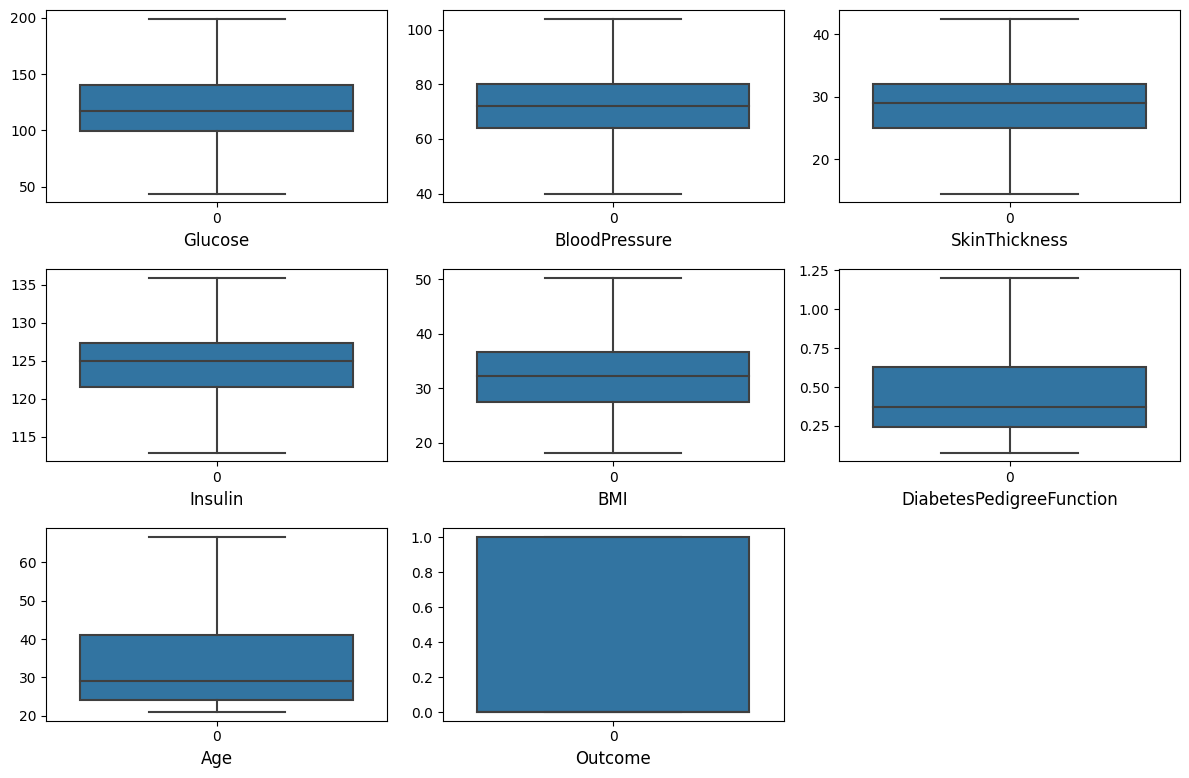

In [14]:
plt.figure(figsize = (12,10))
plot_no = 1
for i in df_filtered.columns:
    ax = plt.subplot(4,3, plot_no)
    sns.boxplot(df_filtered[i])
    plt.xlabel(i, fontsize=12)
    plot_no +=1
plt.tight_layout()
plt.show()

### **Some Basic Plots**

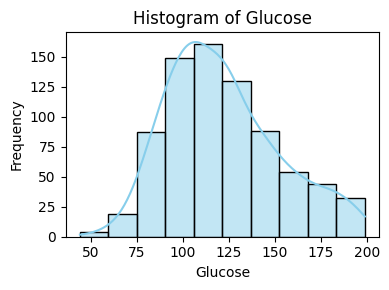

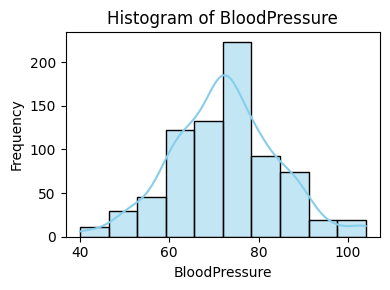

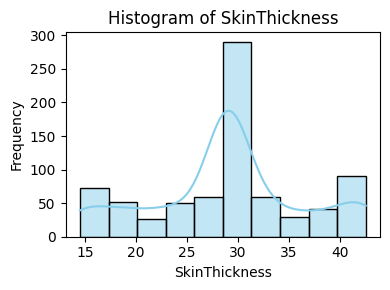

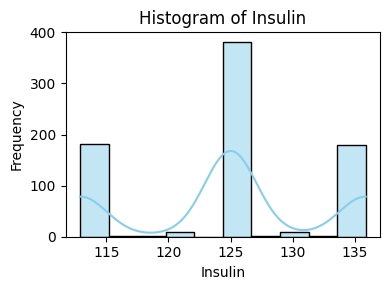

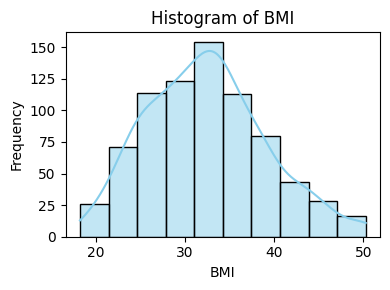

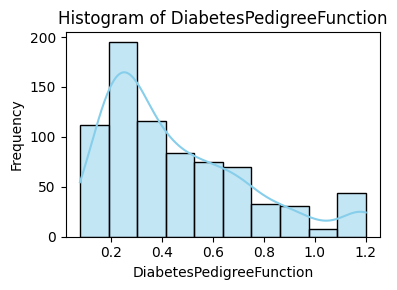

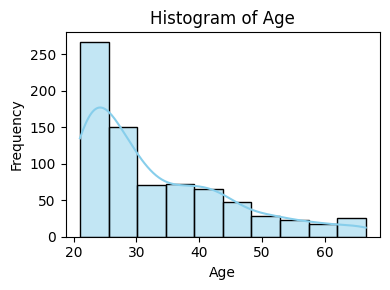

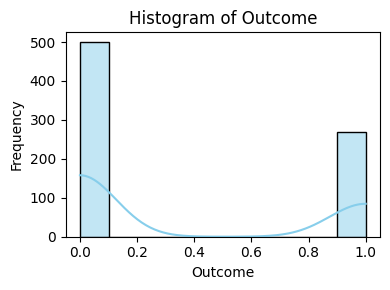

In [15]:
for column in df_filtered.columns:
    plt.figure(figsize=(4, 3))
    sns.histplot(df_filtered[column], bins=10, color='skyblue', edgecolor='black',kde=True)  # Plot histogram
    plt.xlabel(column) 
    plt.ylabel('Frequency') 
    plt.title('Histogram of {}'.format(column)) 
    plt.tight_layout()
    plt.show() 

Outcome
0.0    500
1.0    268
Name: count, dtype: int64


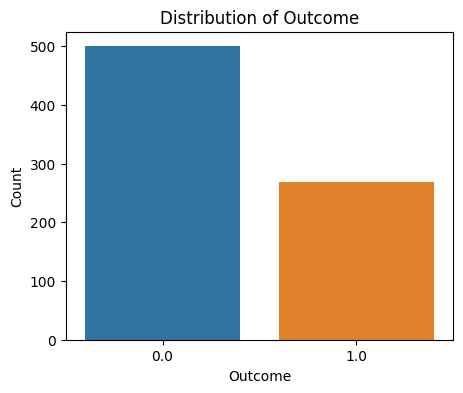

In [16]:
print(df_filtered.Outcome.value_counts())
plt.figure(figsize=(5,4))
sns.barplot(x=df_filtered.Outcome.value_counts().index, y=df_filtered.Outcome.value_counts())
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.title('Distribution of Outcome')
plt.show()

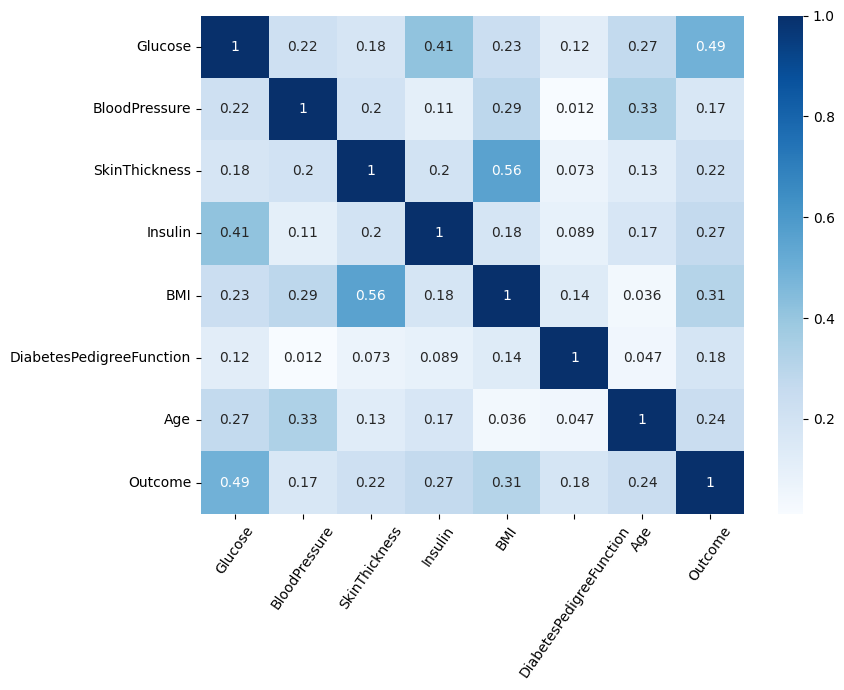

In [17]:
plt.figure(figsize=(9, 7))  # Increase the figure size
p = sns.heatmap(df_filtered.corr(), annot=True, cmap='Blues')
plt.xticks(rotation=55)
plt.tight_layout()
plt.show()

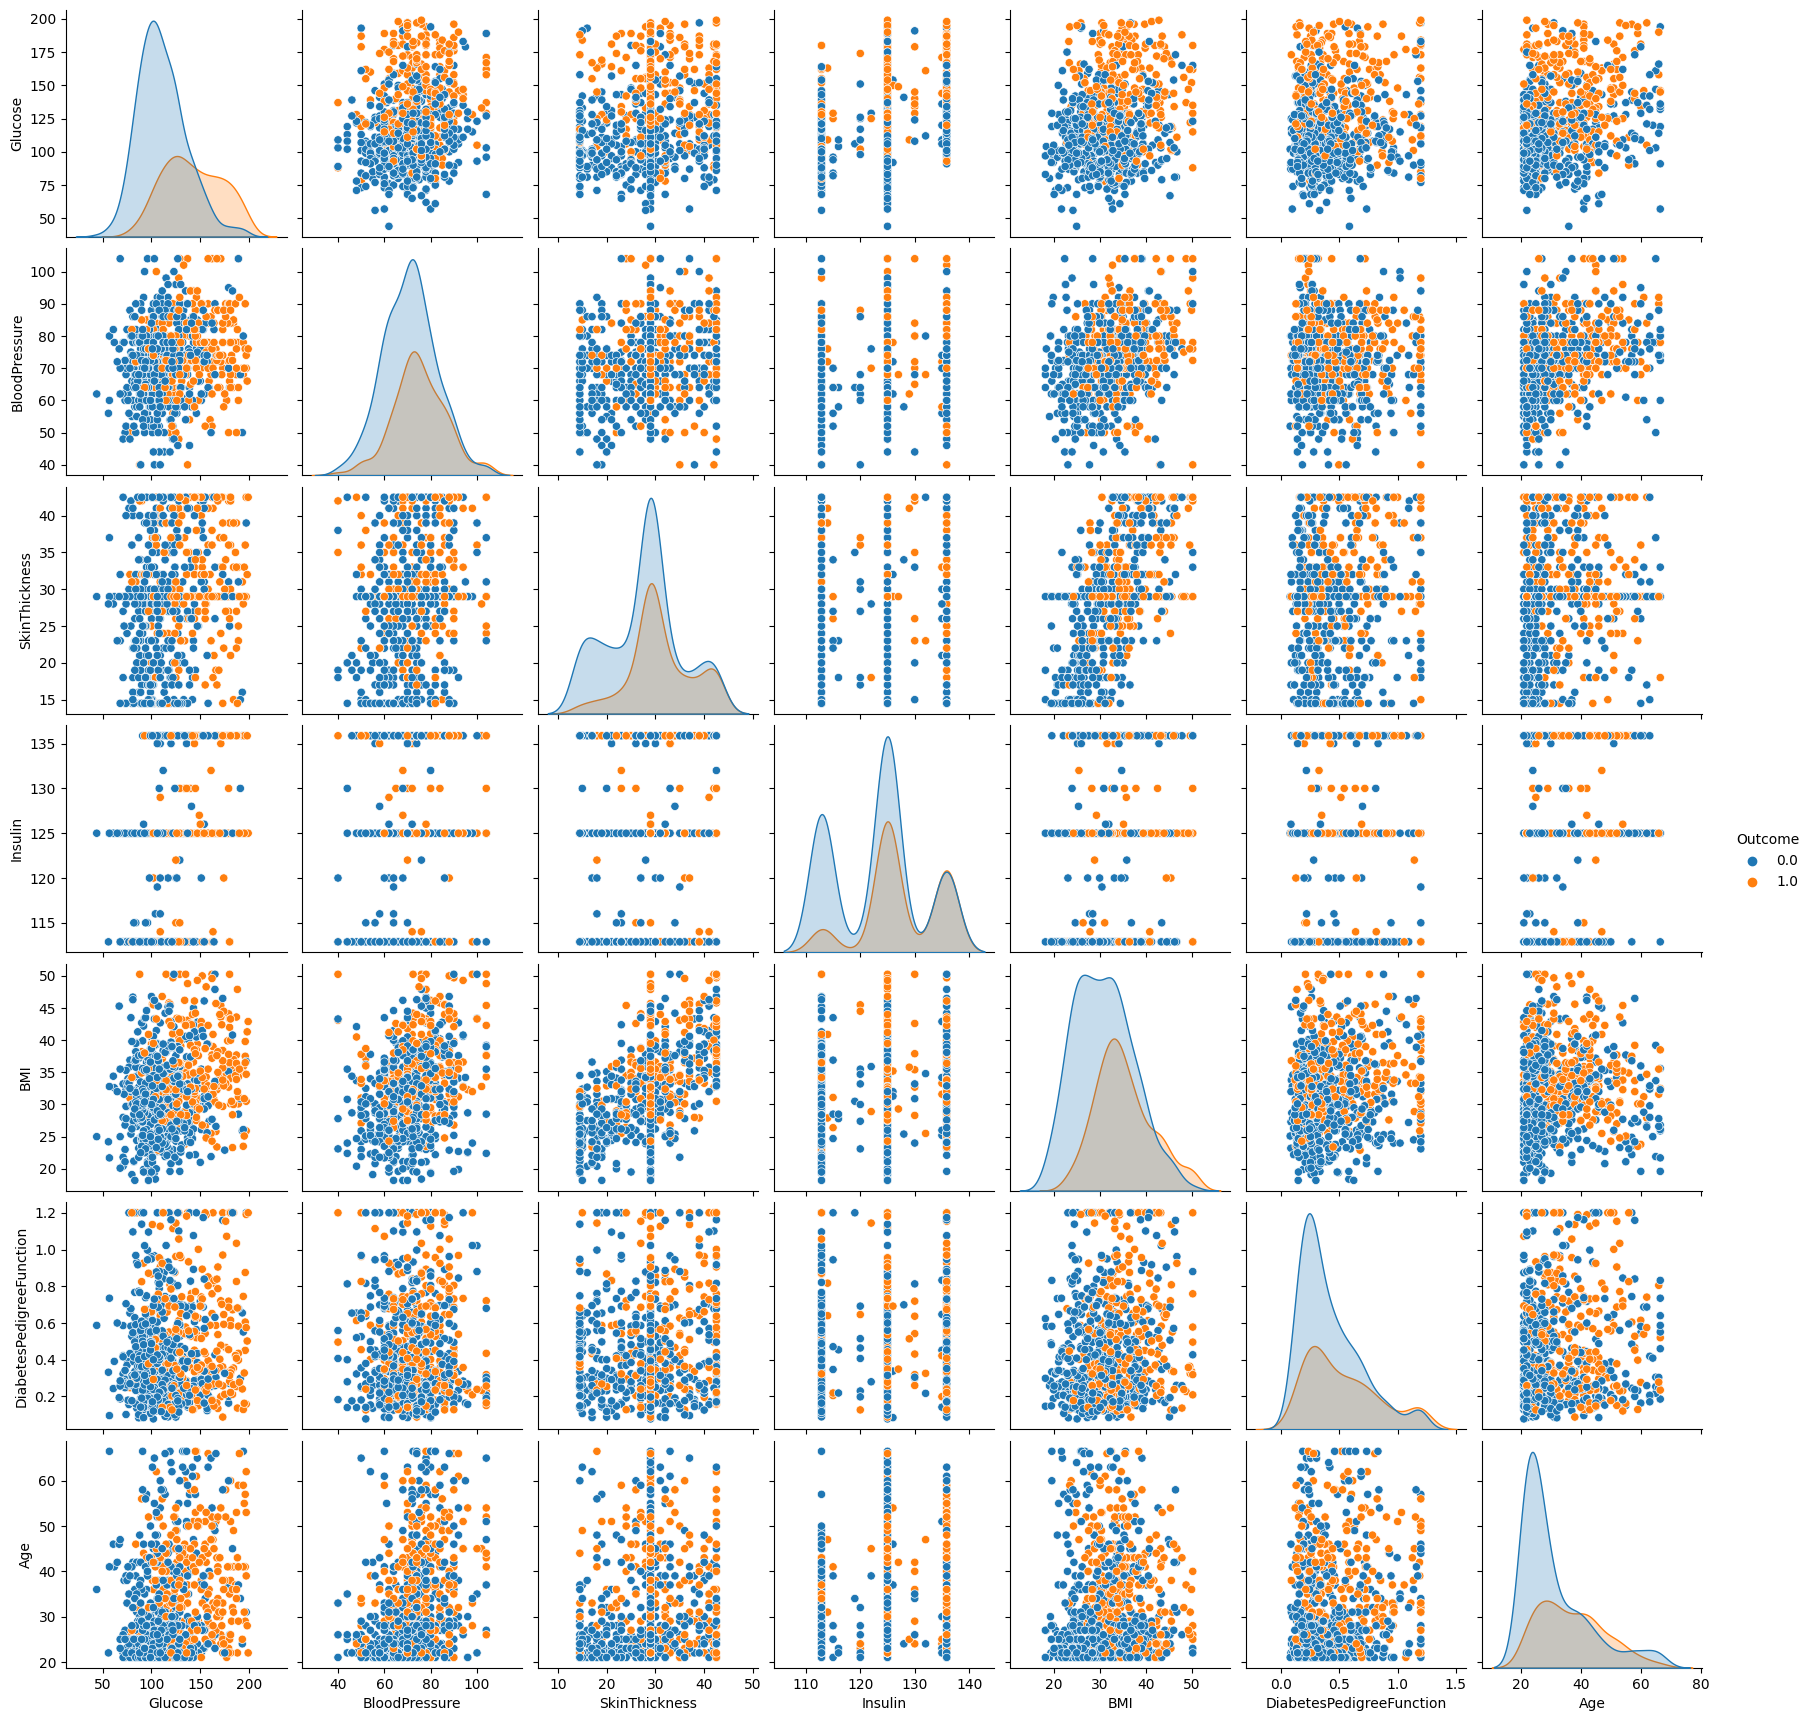

In [18]:
sns.pairplot(df_filtered,hue='Outcome')

In [19]:
X=df_filtered.drop(['Outcome'],axis=1)
y=df['Outcome']

In [20]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=0)
score_list = {} 

In [21]:
from sklearn import metrics
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_curve,roc_auc_score

In [22]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

## Logistic Regression

In [23]:
from sklearn.linear_model import LogisticRegression
lc=LogisticRegression()

In [24]:
lc.fit(X_train,y_train)

LogisticRegression()

In [25]:
y_pred=lc.predict(X_test)

In [26]:
score=lc.score(X_test,y_test)
score_list["Logistic Regression"] = score
print(f"Score is {score}")

Score is 0.7857142857142857


In [27]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85       107
           1       0.68      0.57      0.62        47

    accuracy                           0.79       154
   macro avg       0.75      0.73      0.74       154
weighted avg       0.78      0.79      0.78       154



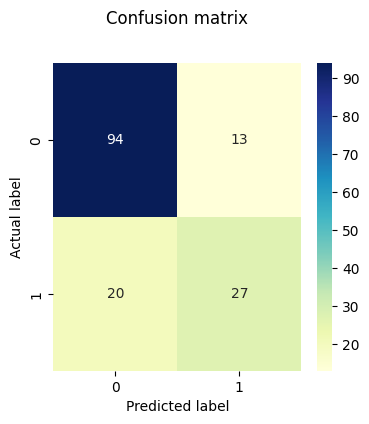

In [28]:
plt.figure(figsize=(4,4))
cnf_matrix_lc = metrics.confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix_lc), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [29]:
y_pred_proba = lc.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

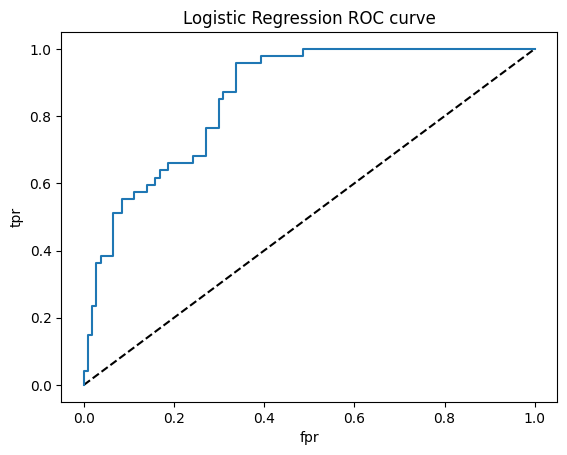

In [30]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Logistic Regression')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Logistic Regression ROC curve')
plt.show()

In [31]:
roc_auc_score(y_test,y_pred_proba)

0.8572280771525154

## K-Nearest Neighbors

In [32]:
from sklearn.neighbors import KNeighborsClassifier 
knn = KNeighborsClassifier(n_neighbors=9)

knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
knn_score = knn.score(X_test,y_test)
score_list["KNN Classifier"] = knn_score
print(f"Score is {knn_score}")

Score is 0.8051948051948052


In [33]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.88      0.86       107
           1       0.70      0.64      0.67        47

    accuracy                           0.81       154
   macro avg       0.77      0.76      0.76       154
weighted avg       0.80      0.81      0.80       154



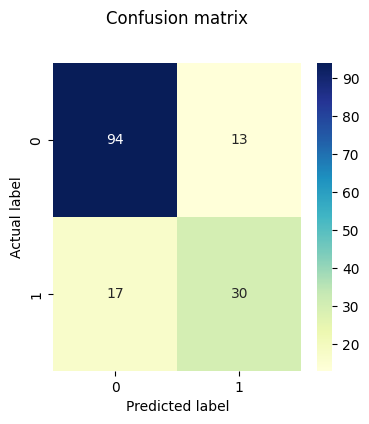

In [34]:
plt.figure(figsize=(4,4))
cnf_matrix_knn = metrics.confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix_knn), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

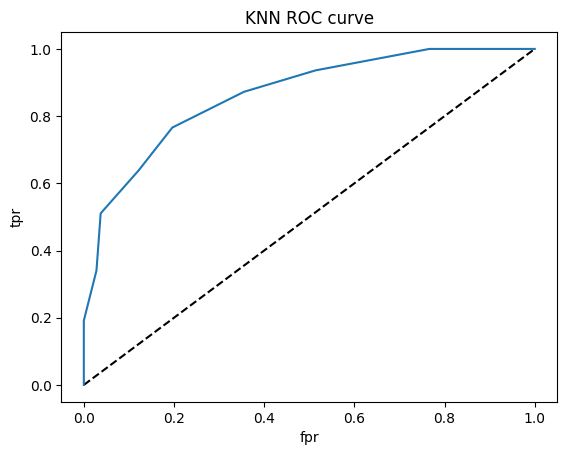

In [35]:
y_pred_proba = knn.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='KNN')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('KNN ROC curve')
plt.show()

In [36]:
print("The AUC score of KNN is :",roc_auc_score(y_test,y_pred_proba)) 

The AUC score of KNN is : 0.8639888645854047


## Support Vector Classifier

In [37]:
from sklearn.svm import SVC 

svc = SVC(random_state=0,probability=True)
svc.fit(X_train,y_train)
svc_score = svc.score(X_test,y_test)
y_pred = svc.predict(X_test)
score_list["Support Vector Classifier"] = svc_score
print(f"Score is {svc_score}")

Score is 0.8051948051948052


In [38]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86       107
           1       0.72      0.60      0.65        47

    accuracy                           0.81       154
   macro avg       0.78      0.75      0.76       154
weighted avg       0.80      0.81      0.80       154



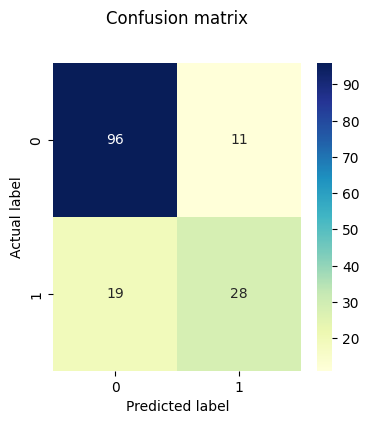

In [39]:
plt.figure(figsize=(4,4))
cnf_matrix_svm = metrics.confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix_svm), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

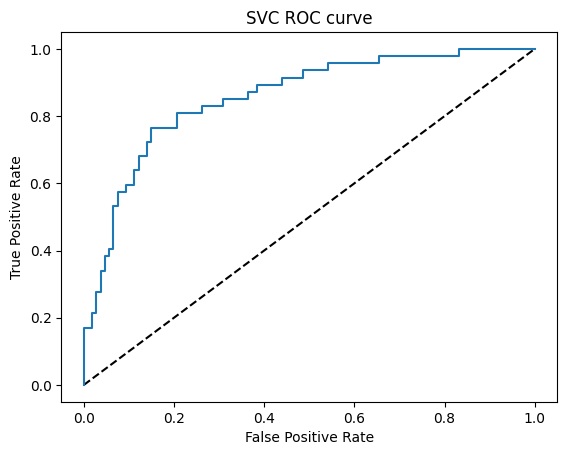

In [40]:
y_pred_decision = svc.decision_function(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_decision)

plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='SVC')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SVC ROC curve')
plt.show()

In [41]:
print("The AUC score of SVC is :",roc_auc_score(y_test,y_pred_decision)) 

The AUC score of SVC is : 0.856432690395705


## Naive Bayes Classifier

In [42]:
from sklearn.naive_bayes import GaussianNB

nbc = GaussianNB()
nbc.fit(X_train,y_train)
nbc_score = nbc.score(X_test,y_test)
y_pred = nbc.predict(X_test)
score_list["GaussianNBC"] = nbc_score

print(f"Score is {nbc_score}")

Score is 0.7597402597402597


In [43]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.81      0.82       107
           1       0.60      0.64      0.62        47

    accuracy                           0.76       154
   macro avg       0.72      0.73      0.72       154
weighted avg       0.76      0.76      0.76       154



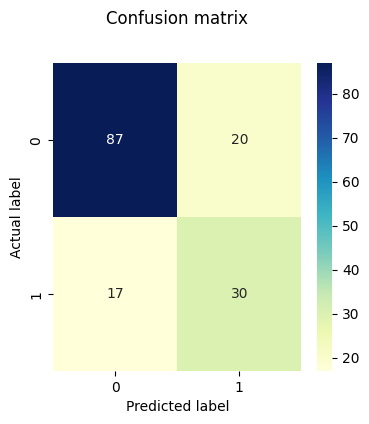

In [44]:
plt.figure(figsize=(4,4))
cnf_matrix_nbc = metrics.confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix_nbc), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

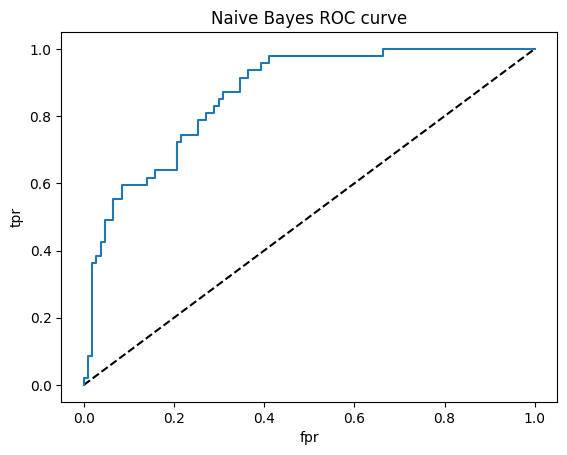

In [45]:
y_pred_proba = nbc.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Naive Bayes')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Naive Bayes ROC curve')
plt.show()

In [46]:
print("The AUC score of Naive Bayes is :",roc_auc_score(y_test,y_pred_proba)) 

The AUC score of Naive Bayes is : 0.8635911712069994


## Decision Tree Classifier

In [47]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=0)
dtc.fit(X_train,y_train)
y_pred = dtc.predict(X_test)
dtc_score = dtc.score(X_test,y_test)
score_list["Decision Trees Classifier"] = dtc_score
print(f"Score is {dtc_score}")

Score is 0.7402597402597403


In [48]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.79      0.81       107
           1       0.57      0.64      0.60        47

    accuracy                           0.74       154
   macro avg       0.70      0.71      0.70       154
weighted avg       0.75      0.74      0.74       154



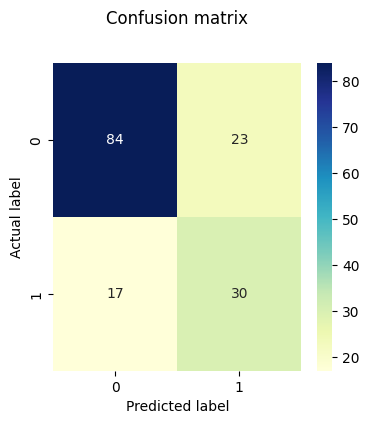

In [49]:
plt.figure(figsize=(4,4))
cnf_matrix_dtc = metrics.confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix_dtc), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

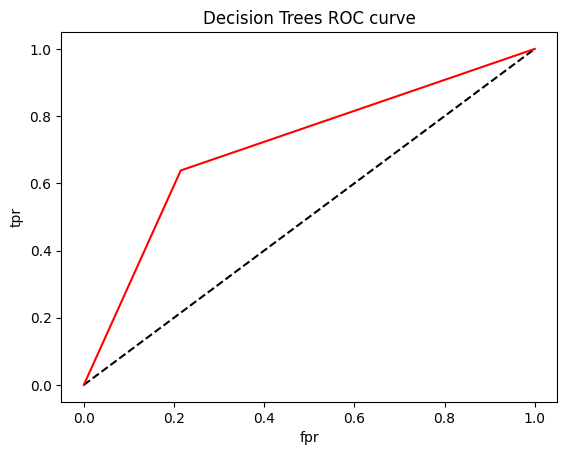

In [50]:
y_pred_proba = dtc.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Decision Tree',color='r')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Decision Trees ROC curve')
plt.show()

In [51]:
print("The AUC score of Decision Trees Classifier is :",roc_auc_score(y_test,y_pred_proba)) 

The AUC score of Decision Trees Classifier is : 0.711672300656194


### Final ROC Curve

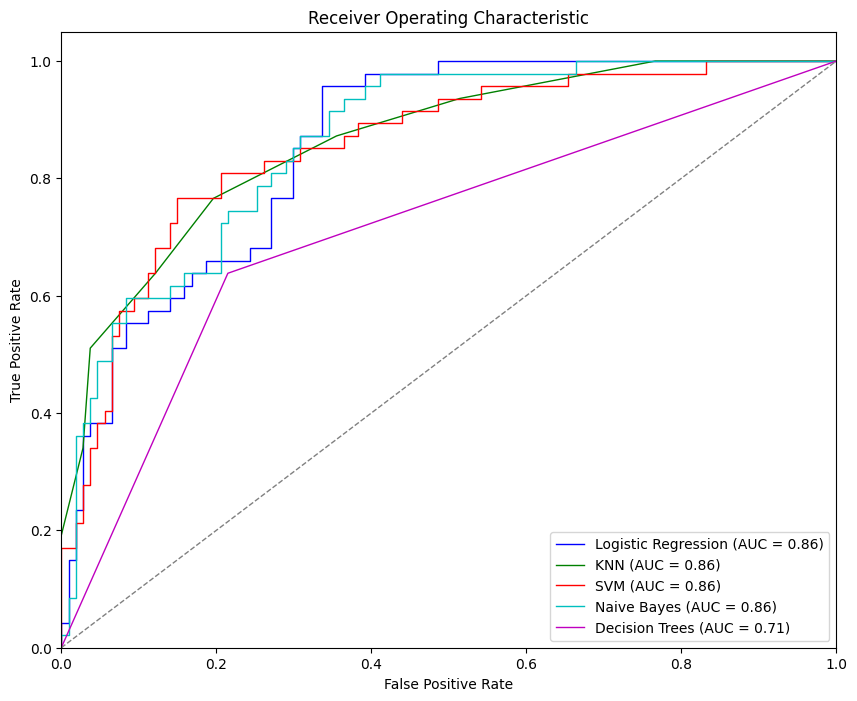

In [52]:
from sklearn.metrics import auc

classifiers = [lc, knn, svc, nbc, dtc]
labels = ['Logistic Regression', 'KNN', 'SVM', 'Naive Bayes', 'Decision Trees']
colors = ['b', 'g', 'r', 'c', 'm']

plt.figure(figsize=(10, 8))

for clf, label, color in zip(classifiers, labels, colors):
    y_pred_proba = clf.predict_proba(X_test)[:,1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color=color, lw=1, label=label + ' (AUC = %0.2f)' % roc_auc)

plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--') 
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

### Analysis of Scores

In [53]:
scores=pd.DataFrame(list(score_list.items()), columns=['Classifier', 'Score'])
scores

,Classifier,Score
0,Logistic Regression,0.785714
1,KNN Classifier,0.805195
2,Support Vector Classifier,0.805195
3,GaussianNBC,0.759740
4,Decision Trees Classifier,0.740260


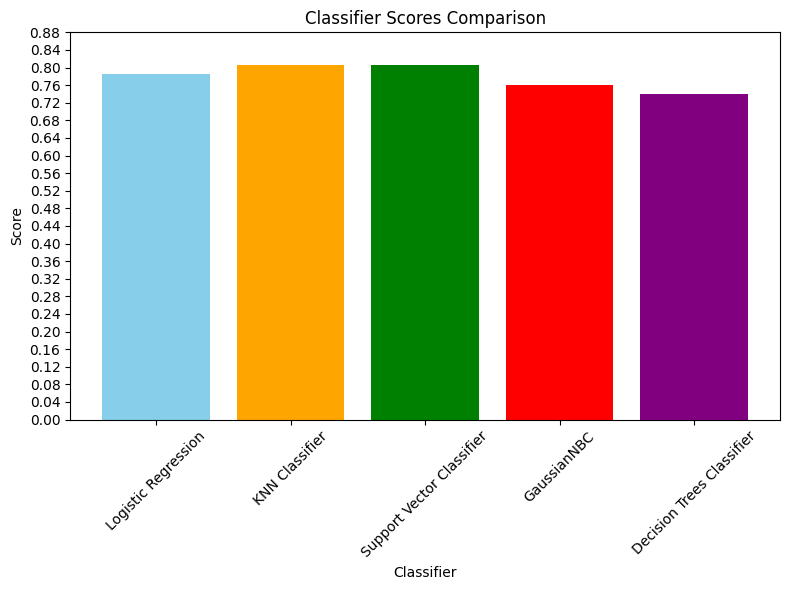

In [54]:
colors = ['skyblue', 'orange', 'green', 'red', 'purple', 'pink'] 
plt.figure(figsize=(8, 6))
plt.bar(scores['Classifier'], scores['Score'], color=colors)
plt.xlabel('Classifier')
plt.ylabel('Score')
plt.title('Classifier Scores Comparison')
plt.yticks([i/25 for i in range(23)])
plt.xticks(rotation=45) 
plt.tight_layout()
plt.show()

### Some Additional Algorithms

In [55]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=300,random_state=0)
rfc.fit(X_train,y_train)
rfc_score = rfc.score(X_test,y_test)
y_pred = rfc.predict(X_test)
print(f"Score is {rfc_score}")


Score is 0.8051948051948052


In [56]:
acc_rf = round( metrics.accuracy_score(y_test, y_pred) * 100 , 2 )
print( 'Accuracy of Random Forest model : ', acc_rf )

Accuracy of Random Forest model :  80.52


In [57]:
from xgboost import XGBClassifier

In [58]:
xgb_clf = XGBClassifier(n_estimators = 500,
                        learning_rate = 0.05,
                        use_label_encoder = False,
                        eval_metric = "logloss",
                        n_jobs = -1)

In [59]:
xgb_clf.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.05, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=500,
              n_jobs=-1, num_parallel_tree=None, random_state=None, ...)

In [60]:
pred_test = xgb_clf.predict(X_test)
test_score = accuracy_score(pred_test, y_test)
print("Test score:", np.round(test_score,4))

Test score: 0.7857
